In [1]:
#Importation des librairies et données
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
# Chargement des données (une fois téléchargées sur /data)
df = pd.read_csv("/content/Spotify Most Streamed Songs.csv")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [10]:
# Aperçu des colonnes et types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [12]:
# Convertir la colonne 'streams' en numérique (int)

df['streams'] = pd.to_numeric(df['streams'].str.replace(',', ''), errors='coerce')
df['streams'] = df['streams'].fillna(0).astype(int)

In [13]:
# Vérifier et gérer les valeurs manquantes pour les colonnes clés
print(df.isnull().sum())


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64


In [14]:
# 3. Renommer les colonnes pour simplifier les noms
df.rename(columns={'artist(s)_name': 'artist', 'track_name': 'track'}, inplace=True)

In [15]:
# 4. Créer une colonne cible "Top_Spotify" pour prédire si une chanson est dans le top 25%
threshold = df['streams'].quantile(0.75)
df['Top_Spotify'] = (df['streams'] >= threshold).astype(int)


In [16]:
# 5. Sélection des variables audio pertinentes
audio_features = [
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm'
]

In [17]:
# 6. Extraction des données audio + cible
X = df[audio_features]
y = df['Top_Spotify']

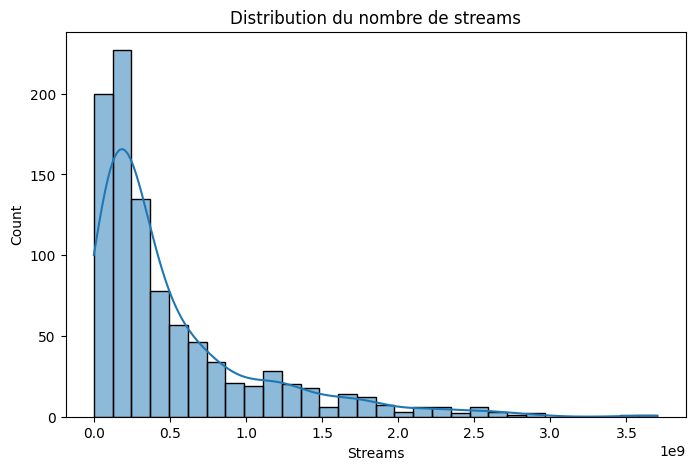

In [18]:
# Distribution des streams
plt.figure(figsize=(8,5))
sns.histplot(df['streams'], bins=30, kde=True)
plt.title("Distribution du nombre de streams")
plt.xlabel("Streams")
plt.show()

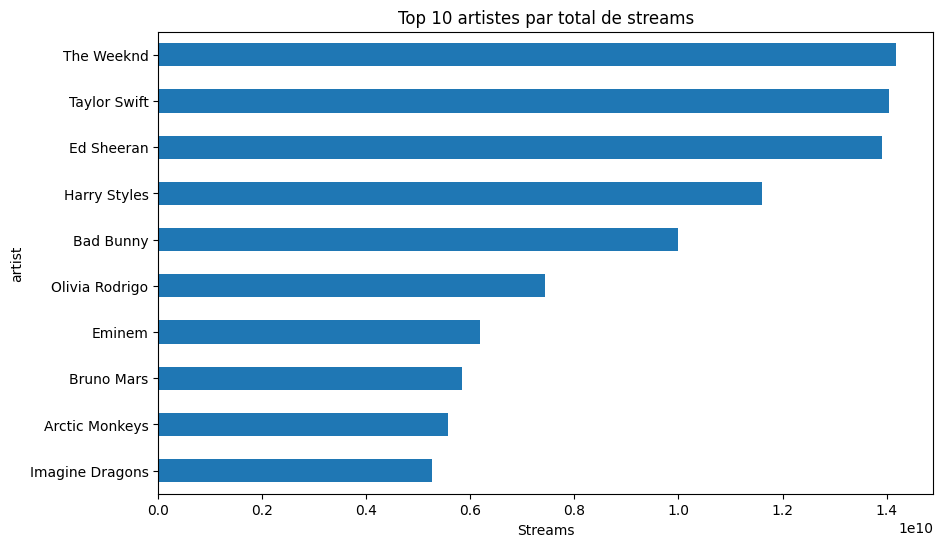

In [19]:
# Top 10 artistes par nombre total de streams
top_artists = df.groupby('artist')['streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_artists.plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 artistes par total de streams")
plt.xlabel("Streams")
plt.show()


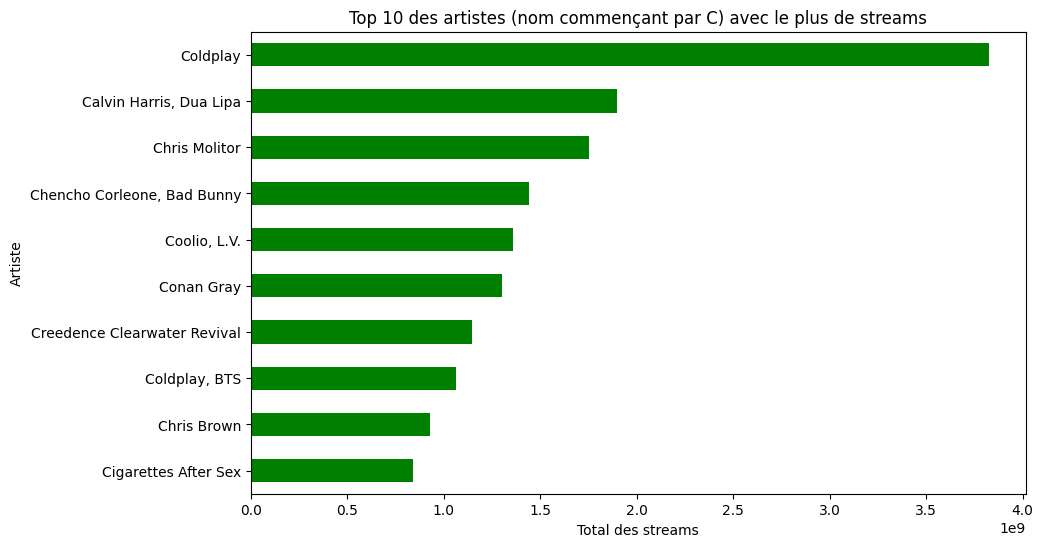

In [20]:
# Filtrer les artistes dont le nom commence par "C" (insensible à la casse)
df_c = df[df['artist'].str.startswith('C', na=False)]
top_c_artists = df_c.groupby('artist')['streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_c_artists.plot(kind='barh', color='green')
plt.gca().invert_yaxis()
plt.title("Top 10 des artistes (nom commençant par C) avec le plus de streams")
plt.xlabel("Total des streams")
plt.ylabel("Artiste")
plt.show()

<ipython-input-27-838018368>:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_artists_by_continent = grouped.groupby('continent').apply(
<ipython-input-27-838018368>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='streams', y='artist', data=America_top, palette='cool')


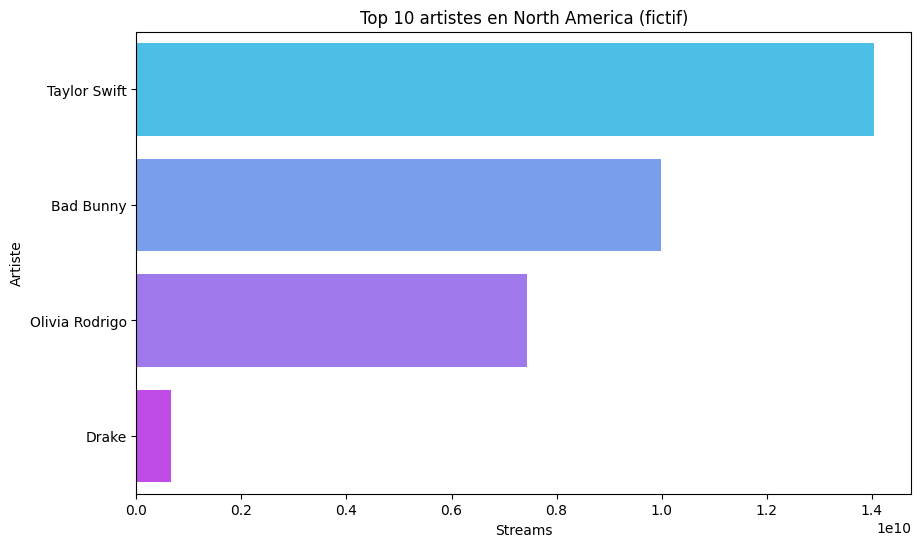

In [27]:
# Exemple fictif d'ajout de pays
artist_country_map = {
    'Taylor Swift': 'USA',
    'Bad Bunny': 'Puerto Rico',
    'Olivia Rodrigo': 'USA',
    'BTS': 'South Korea',
    'Celine Dion': 'Canada',
    'Coldplay': 'UK',
    'Drake': 'Canada',
    'Blackpink': 'South Korea',
    # ...
}

# Créer une nouvelle colonne "country"
df['country'] = df['artist'].map(artist_country_map)

# Ajout d’une colonne continent
country_continent_map = {
    'USA': 'North America',
    'Canada': 'North America',
    'Puerto Rico': 'North America',
    'South Korea': 'Asia',
    'UK': 'Europe',
    # ...
}
df['continent'] = df['country'].map(country_continent_map)

# Groupe par continent et artiste, on somme les streams
grouped = df.groupby(['continent', 'artist'])['streams'].sum().reset_index()

# Pour chaque continent, on garde le top 10
top_artists_by_continent = grouped.groupby('continent').apply(
    lambda x: x.sort_values(by='streams', ascending=False).head(15)
).reset_index(drop=True)

# Affichage : par exemple, artistes top en Amerique du nord
America_top = top_artists_by_continent[top_artists_by_continent['continent'] == 'North America']
plt.figure(figsize=(10,6))
sns.barplot(x='streams', y='artist', data=America_top, palette='cool')
plt.title("Top 10 artistes en North America (fictif)")
plt.xlabel("Streams")
plt.ylabel("Artiste")
plt.show()


In [28]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Prédictions et évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86       147
           1       0.43      0.07      0.12        44

    accuracy                           0.76       191
   macro avg       0.60      0.52      0.49       191
weighted avg       0.70      0.76      0.69       191



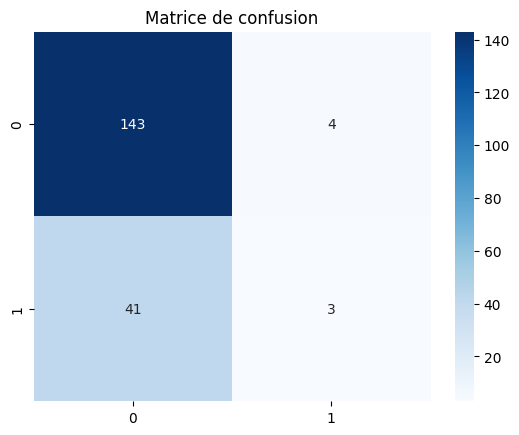

In [31]:
# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

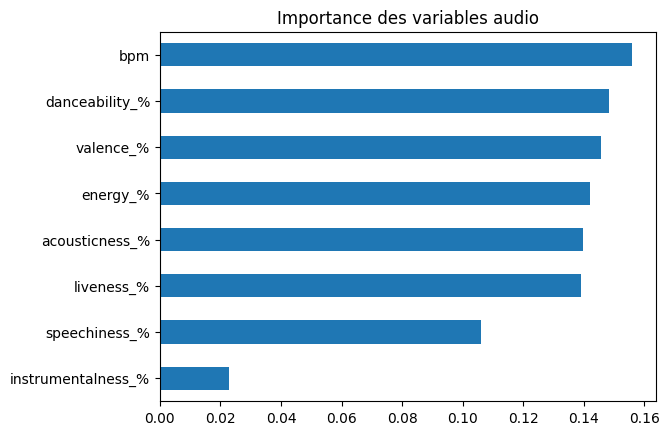

In [32]:
# Importance des variables
importances = pd.Series(model.feature_importances_, index=audio_features)
importances.sort_values().plot(kind='barh', title='Importance des variables audio')
plt.show()